Project 4 - Advanced Lane Finding - Report. Vilas Chitrakaran. Feb 2017

## Executive Summary

__TODO__

## Camera Calibration

Corner detection failed on  ./camera_cal/calibration4.jpg
Corner detection failed on  ./camera_cal/calibration1.jpg
Corner detection failed on  ./camera_cal/calibration5.jpg
Camera intrinsic matrix:
 [[  1.15396093e+03   0.00000000e+00   6.69705357e+02]
 [  0.00000000e+00   1.14802496e+03   3.85656234e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
Camera distortion parameters:
 [[ -2.41017956e-01  -5.30721173e-02  -1.15810355e-03  -1.28318856e-04
    2.67125290e-02]]
Test undistortion on one of the images


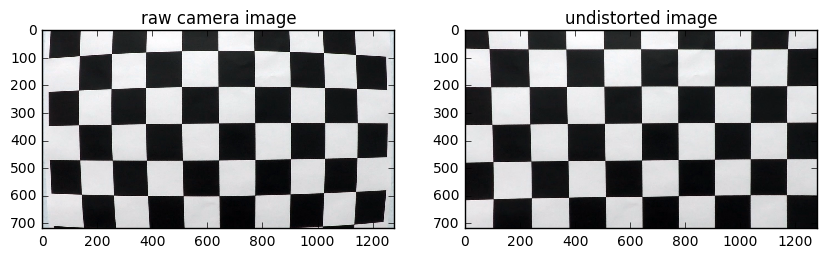

In [44]:
#=====================================================================
# Camera calibration
# Note: The following comes from code provided in examples directory

import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
#%matplotlib qt5
%matplotlib inline

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), cv2.CALIB_CB_ADAPTIVE_THRESH)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        #plt.figure()
        cv2.imshow('img',img)
        cv2.waitKey(500)
    else:
        print("Corner detection failed on ", fname)

cv2.destroyAllWindows()

# now calibrate the camera
ret, cam_mtx, dist_pars, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print('Camera intrinsic matrix:\n', cam_mtx)
print('Camera distortion parameters:\n', dist_pars)

# test undistortion
img = cv2.imread('./camera_cal/calibration1.jpg')
undist = cv2.undistort(img, cam_mtx, dist_pars, None, cam_mtx)

print('Test undistortion on one of the images')
f, axarr = plt.subplots(1,2,figsize=(10,10))
axarr[0].imshow(img)
axarr[0].set_title('raw camera image')
axarr[1].imshow(undist)
axarr[1].set_title('undistorted image');


## Setup Perspective Transform

* Find an image with straight road
* pick four points, transform to top view
    * use DVLA info on lane markings to determine correct ratios
* test on an image

Test perspective transform


array([[  1.14444090e-01,   8.07077368e-02,   8.39824986e+01],
       [ -6.93889390e-18,   3.65650164e-01,   4.26565042e+01],
       [  5.42101086e-20,   5.73518001e-04,   1.00000000e+00]])

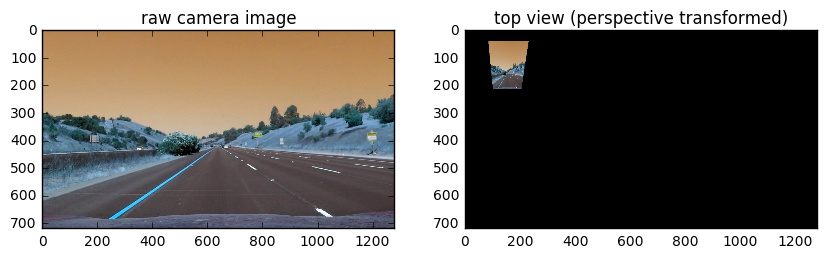

In [54]:
#=====================================================================
# Setup perspective transform

from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display

def setup_perspective(topY, bottomY, topLeftX, topRightX, bottomLeftX, bottomRightX):
    
    # read the image in and undistort it
    img = cv2.imread('./test_images/straight_lines1.jpg')
    undist = cv2.undistort(img, cam_mtx, dist_pars, None, cam_mtx)
    img_size = (img.shape[1], img.shape[0])
    
    # I select the four points on the source image manually 
    src_pts = np.float32(
        [[topLeftX, topY],
         [topRightX, topY],
         [bottomRightX, bottomY],
         [bottomLeftX, bottomY]])
    offset = 100
    dst_pts= np.float32(
        [[offset,offset],
         [offset+100, offset],
         [offset+100, offset+100],
         [offset, offset+100]])
    pers_mtx = cv2.getPerspectiveTransform(src_pts, dst_pts)
    
    # now transform to top view
    transformed = cv2.warpPerspective(undist, pers_mtx, img_size, flags=cv2.INTER_LINEAR)
    
    print('Test perspective transform')
    f, axarr = plt.subplots(1,2,figsize=(10,10))
    axarr[0].imshow(img)
    axarr[0].set_title('raw camera image')
    axarr[1].imshow(transformed)
    axarr[1].set_title('top view (perspective transformed)');
    
    return pers_mtx

pers_mtx = interact(setup_perspective, 
                    topY=(100,700), 
                    bottomY=(100,700),
                    topLeftX=(0,600), 
                    topRightX=(600,1200), 
                    bottomLeftX=(0,600), 
                    bottomRightX=(600,1200))